In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# Load the dataset
file_path = 'historical_farm_data_tamil_nadu.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['crop_type', 'growth_stage', 'soil_type']:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le

# Select features and target variable
features = ['soil_moisture', 'temperature', 'humidity', 'rain_forecast', 
            'crop_type_encoded', 'growth_stage_encoded', 'soil_type_encoded']
X = data[features]
y = data['water_demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)

print(f"Model R^2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred):.4f}")

# Predict water demand for all farms
data['predicted_water_demand'] = model.predict(scaler.transform(X))


Model R^2 Score: 0.0782
Root Mean Squared Error: 71.1215
Explained Variance Score: 0.0801


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'historical_farm_data_tamil_nadu.csv'
data = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for column in ['crop_type', 'growth_stage', 'soil_type']:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le

# Select features and target variable
features = ['soil_moisture', 'temperature', 'humidity', 'rain_forecast', 
            'crop_type_encoded', 'growth_stage_encoded', 'soil_type_encoded']
X = data[features]
y = data['water_demand']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Grid search for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # List of neighbors to test
    'p': [1, 2],                      # Distance metrics (1 for Manhattan, 2 for Euclidean)
    'weights': ['uniform', 'distance'] # Weight functions
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_pca, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test_pca)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model R^2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred):.4f}")

Best Parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Model R^2 Score: 0.1444
Root Mean Squared Error: 68.5216
Explained Variance Score: 0.1457


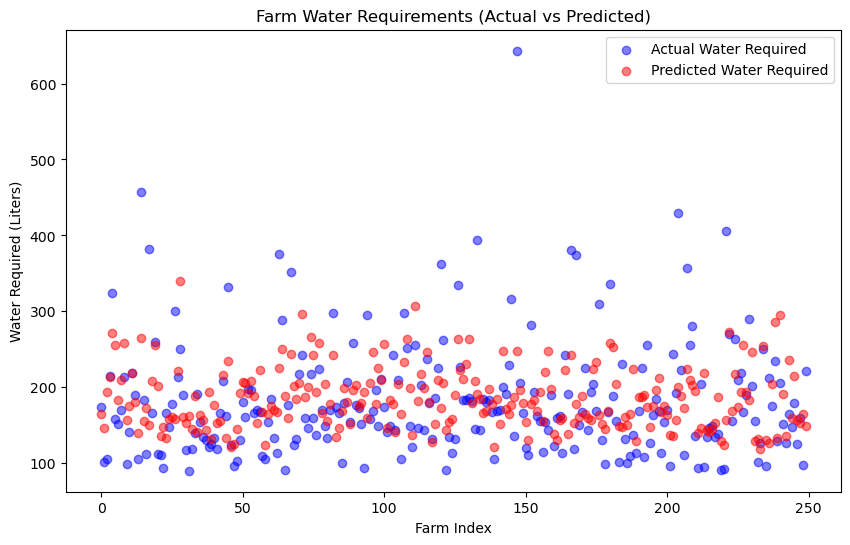

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a plot of predicted water requirements vs actual water requirements
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test[:250])), y_test[:250], color='blue', label='Actual Water Required', alpha=0.5)
plt.scatter(range(len(y_pred[:250])), y_pred[:250], color='red', label='Predicted Water Required', alpha=0.5)
plt.title('Farm Water Requirements (Actual vs Predicted)')
plt.xlabel('Farm Index')
plt.ylabel('Water Required (Liters)')
plt.legend()
plt.show()